In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("data/Repair_Motor_vehicle.csv")
dataset.head(3)

,Registration Type,Corporation Name,Trade Name,Business Address,Business Address2,City,State,Zip,Phone Number,# ASE Certified Mechanics,Tow Storage Address,Tow Storage 2,Tow Storage City,Tow Storage State,Tow Storage Zip,Tow Storage Phone,Issue Date,Expiration,Registration No.,Location
0,Corporation,MG Auto & Truck Repair Services LLC,MG Auto & Truck Repair Services LLC,8146 Beechcraft Ave.,8146,Gaithersburg,MD,20879,(301) 848-1294,0,NaN,NaN,NaN,NaN,NaN,NaN,12/11/2024,12/11/2025,19-MT-002754,"8146 Beechcraft Ave.\nGaithersburg, MD 20879\n..."
1,Corporation,"E & S Towing Services, Inc.",E & S Towing Service,15814 Paramount Dr,NaN,Rockville,MD,20855,(240) 304-9367,0,15814 Paramount Dr,NaN,Rockville,MD,20906,(240) 304-9367,12/02/2024,12/02/2025,20-MT-005316,"15814 Paramount Dr\nRockville, MD 20855\n(39.1..."
2,Corporation,"Mohamed M. Kheiry, LLC",Satellite Motors,8109 Mayor Lane,NaN,Silver Spring,MD,20910,(301) 585-7876,0,NaN,NaN,NaN,NaN,NaN,NaN,12/22/2024,12/22/2027,17-MT-001433,"8109 Mayor Lane\nSilver Spring, MD 20910\n(38...."


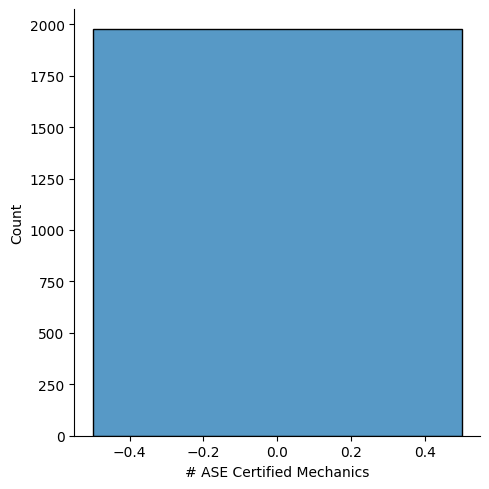

In [10]:
sns.displot(dataset["# ASE Certified Mechanics"])
plt.show()

In [5]:
q1 = dataset["# ASE Certified Mechanics"].quantile(0.25)
q3 = dataset["# ASE Certified Mechanics"].quantile(0.75)

IQR = q3 - q1

IQR

np.float64(0.0)

In [ ]:
min_r = q1 - (1.5 * IQR)
max_r = q3 + (1.5 * IQR)

min_r, max_r

(np.float64(0.0), np.float64(0.0))

In [ ]:
dataset = dataset[dataset["# ASE Certified Mechanics"] <= max_r]

In [14]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(func=np.log1p)
ft.fit(dataset[["# ASE Certified Mechanics"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [17]:
dataset["# ASE Certified Mechanics_T"] = ft.transform(dataset[["# ASE Certified Mechanics"]])

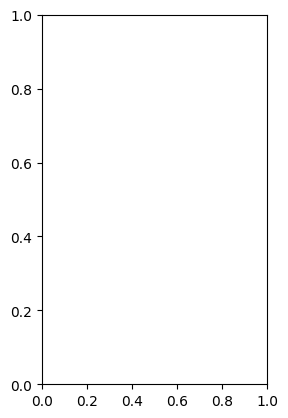

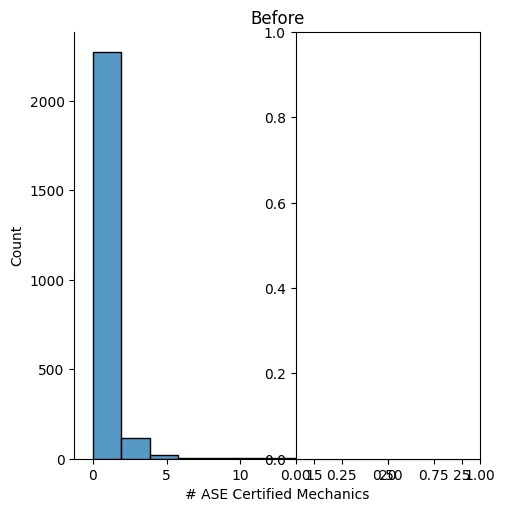

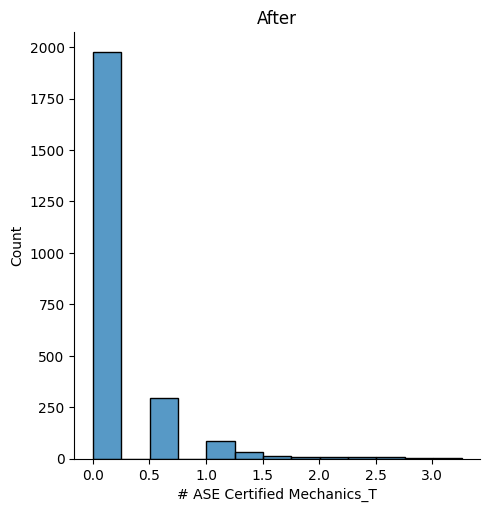

In [20]:
plt.subplot(1,2,1)
sns.displot(dataset["# ASE Certified Mechanics"])
plt.title("Before")


plt.subplot(1,2,2)
sns.displot(dataset["# ASE Certified Mechanics_T"])
plt.title("After")

plt.show()
